# Ideas
- Compare against analytical methods
- Try to take in to account whether the randomness in generated data set is just bad and causes systematic error, or is it the methods
- Looks like it's a good idea to sample the data sets as well, because there's not that much randomness in the training and AID graph can randomly increase with sample size
- For binary data, convergence is slow for analytical methods as well as for gaussian VAE. binary VAE is really good, actually.

## TODO:
- Load the models here and plot results
- Code new AID calculation for linear model as well

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from CEVAE import *
from cevaetools import *
from lineartoydata import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Linear data param1 experiment

In [4]:
main_folder = "linear_data_tests"

In [6]:
# Load data gen parameters
sub_folder_params = "params1"
[c_x, c_t, c_yz, c_yt, s_x, s_t, s_y] = load_dataparameters(main_folder, sub_folder_params)

In [7]:
data_sub_folder = "params1data500to8000"
param_times = 10
dfs, datasets = load_dfs(main_folder, data_sub_folder, param_times=param_times)

In [16]:
device="cpu"

num_epochs=100
lr_start=0.01
lr_end=0.001
z_dim=10
p_y_zt_nn_layers=3
p_y_zt_nn_width=30
p_t_z_nn_layers=3
p_t_z_nn_width=30
p_x_z_nn_layers=3
p_x_z_nn_width=30
q_z_nn_layers=3
q_z_nn_width=30
t_mode=0
y_mode=0
x_mode=np.array([0,0])
x_dim = 2
ty_separate_enc=False
z_mode=0
common_stds = False

train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, common_stds]
datasize = [500,1000,2000,3000,4000,5000,6000,7000,8000]
labels = [str(dsize) for dsize in datasize]

sub_folder_model = "params1data500to8000NNmodels"
models_NN, losses_NN = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

In [19]:
num_epochs=100
lr_start=0.01
lr_end=0.01
z_dim=1
p_y_zt_nn_layers=0
p_y_zt_nn_width=30
p_t_z_nn_layers=0
p_t_z_nn_width=30
p_x_z_nn_layers=0
p_x_z_nn_width=30
q_z_nn_layers=0
q_z_nn_width=30
t_mode=0
y_mode=0
x_mode=np.array([0,0])
x_dim = 2
ty_separate_enc=False
z_mode=0
common_stds = True
x_loss_scaling = 1

train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]

sub_folder_model = "params1data500to8000linearmodels"
models_linear, losses_linear = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

In [18]:
num_epochs=100
lr_start=0.01
lr_end=0.01
z_dim=2
p_y_zt_nn_layers=0
p_y_zt_nn_width=30
p_t_z_nn_layers=0
p_t_z_nn_width=30
p_x_z_nn_layers=0
p_x_z_nn_width=30
q_z_nn_layers=0
q_z_nn_width=30
t_mode=0
y_mode=0
x_mode=np.array([0,0])
x_dim = 2
ty_separate_enc=False
z_mode=0
common_stds = True
x_loss_scaling = 1

train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]

sub_folder_model = "params1data500to8000linearmodelszdim2"
models_linear_zdim2, losses_linear_zdim2 = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

In [23]:
model = models_linear['8000'][9]
estimate_AID_lineardata(model, c_yt, c_yz, s_y, c_t, s_t, c_x, n=100, lim=6, nsample=10000)

(0.027517254436682025,
 array([[3.46953532e-48, 1.20684194e-46, 3.93773939e-45, ...,
         2.05225802e-02, 1.42554039e-02, 9.72338002e-03],
        [2.47363873e-41, 6.33809710e-40, 1.52365479e-38, ...,
         1.58212694e-02, 1.06229464e-02, 6.94331860e-03],
        [8.36797678e-49, 2.98931380e-47, 1.00190573e-45, ...,
         1.37478818e-02, 9.49685813e-03, 6.43706429e-03],
        ...,
        [6.28945131e-03, 9.23859201e-03, 1.33324436e-02, ...,
         5.77144510e-37, 2.88692284e-38, 1.36088292e-39],
        [7.36254307e-03, 1.10342484e-02, 1.61809805e-02, ...,
         1.09250844e-44, 3.85802724e-46, 1.28474224e-47],
        [9.88625173e-03, 1.42070237e-02, 2.00873120e-02, ...,
         3.53522897e-45, 1.24188777e-46, 4.11343774e-48]]),
 array([[4.36804261e-37, 7.10396517e-36, 1.08636500e-34, ...,
         2.68982992e-02, 1.90519683e-02, 1.32300308e-02],
        [2.46313202e-36, 3.85641679e-35, 5.67755536e-34, ...,
         2.17887824e-02, 1.52454536e-02, 1.04581223e-02],
  

In [83]:
AID_NN = np.zeros((param_times, len(labels)))
#AID_linear = np.zeros((param_times, len(labels)))
#AID_linear_zdim2 = np.zeros((param_times, len(labels)))

#gothrough = [(AID_NN, models_NN),(AID_linear, models_linear),(AID_linear_zdim2, models_linear_zdim2)]
gothrough = [(AID_NN, models_NN)]
for AID_,models_ in gothrough:
    for i,label in enumerate(labels):
        print(label)
        for j in range(param_times):
            AID_[j,i] = estimate_AID_lineardata(models_[label][j], c_yt, 
                            c_yz, s_y, c_t, s_t, c_x, n=100, lim=6, nsample=1000)[0]

500
1000
2000
3000
4000
5000
6000
7000
8000


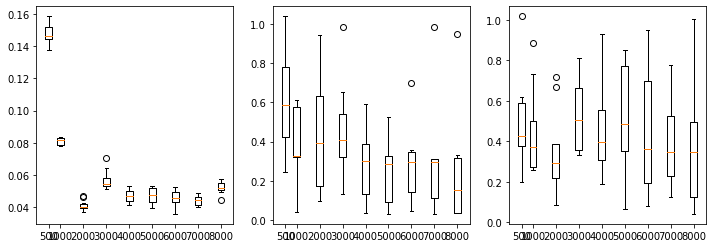

In [84]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
#plt.boxplot(AID_NN)
for i in range(len(labels)):
    ax[0].boxplot(AID_NN[~np.isnan(AID_NN[:,i])][:,i], positions=[datasize[i]], widths=[300])
    ax[1].boxplot(AID_linear[~np.isnan(AID_linear[:,i])][:,i], positions=[datasize[i]], widths=[300])
    ax[2].boxplot(AID_linear_zdim2[~np.isnan(AID_linear_zdim2[:,i])][:,i], positions=[datasize[i]], widths=[300])
plt.show()

# Binary data

In [85]:
main_folder = "binary_data_tests"

In [86]:
# Load data gen parameters
sub_folder_params = "params1"
[z_probs,x_probs,t_probs,y_probs] = load_dataparameters(main_folder, sub_folder_params)

In [87]:
data_sub_folder = "params1data500to8000"
param_times = 10
dfs, datasets = load_dfs(main_folder, data_sub_folder, param_times=param_times)

In [89]:
device = 'cpu'

datasize = [500,1000,3000,5000,10000,15000,20000]

num_epochs=200
lr_start=0.01
lr_end=0.001
z_dim=10
p_y_zt_nn_layers=3
p_y_zt_nn_width=30
p_t_z_nn_layers=3
p_t_z_nn_width=30
p_x_z_nn_layers=3
p_x_z_nn_width=30
q_z_nn_layers=3
q_z_nn_width=30
t_mode=2
y_mode=2
x_mode=np.array([2,2])
x_dim = 2
ty_separate_enc=False
z_mode=0
x_loss_scaling=1
common_stds = False

train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]
labels = [str(dsize) for dsize in datasize]
sub_folder_model = "params1data500to8000NNmodels"
models_NN, losses_NN = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

In [90]:
num_epochs=200
lr_start=0.01
lr_end=0.001
z_dim=1
p_y_zt_nn_layers=3
p_y_zt_nn_width=30
p_t_z_nn_layers=3
p_t_z_nn_width=30
p_x_z_nn_layers=3
p_x_z_nn_width=30
q_z_nn_layers=3
q_z_nn_width=30
t_mode=2
y_mode=2
x_mode=np.array([2,2])
x_dim = 2
ty_separate_enc=False
z_mode=0
train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]
sub_folder_model = "params1data500to8000NNmodelszdim1"

models_NN_zdim1, losses_NN_zdim1 = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

In [91]:
num_epochs=200
lr_start=0.01
lr_end=0.001
z_dim=1
p_y_zt_nn_layers=3
p_y_zt_nn_width=30
p_t_z_nn_layers=3
p_t_z_nn_width=30
p_x_z_nn_layers=3
p_x_z_nn_width=30
q_z_nn_layers=3
q_z_nn_width=30
t_mode=2
y_mode=2
x_mode=np.array([2,2])
x_dim = 2
ty_separate_enc=False
z_mode=2
train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]
sub_folder_model = "params1data500to8000NNmodelsbinaryz"
models_NN_binaryz, losses_NN_binaryz = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

In [92]:
AID_NN = np.zeros((param_times, len(labels)))
AID_NN_zdim1 = np.zeros((param_times, len(labels)))
AID_NN_binaryz = np.zeros((param_times, len(labels)))

gothrough = [(AID_NN, models_NN),(AID_NN_zdim1, models_NN_zdim1),(AID_NN_binaryz, models_NN_binaryz)]
for AID_,models_ in gothrough:
    for i,label in enumerate(labels):
        print(label)
        for j in range(param_times):
            AID_[j,i] = estimate_AID(models_[label][j],z_probs,t_probs,y_probs,n=10000)

500
1000
3000
5000
10000
15000
20000
500
1000
3000
5000
10000
15000
20000
500
1000
3000
5000
10000
15000
20000


In [213]:
# analytical AIDs
from binary_analytical_methods import *
AID_miao = np.zeros(len(labels))
py_dots_miao = np.zeros((len(labels),2))
for i, label in enumerate(labels):
    py_dot1, py_dot0 = analytical_miao_pydot(dfs[label][0])
    py_dot_miao = np.array([[1-py_dot0.item(), py_dot0.item()],[1-py_dot1.item(), py_dot1.item()]])
    py_dots_miao[i,:] = np.array([py_dot0.item(),py_dot1.item()])
    AID_miao[i] = estimate_AID_from_py_dot(py_dot_miao, z_probs, t_probs, y_probs)

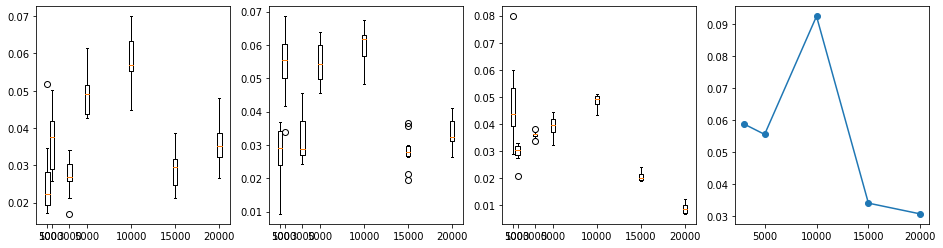

In [217]:
fig, ax = plt.subplots(1,4,figsize=(16,4))
for i in range(len(labels)):
    ax[0].boxplot(AID_NN[~np.isnan(AID_NN[:,i])][:,i], positions=[datasize[i]], widths=[500])
    ax[1].boxplot(AID_NN_zdim1[~np.isnan(AID_NN_zdim1[:,i])][:,i], positions=[datasize[i]], widths=[500])
    ax[2].boxplot(AID_NN_binaryz[~np.isnan(AID_NN_binaryz[:,i])][:,i], positions=[datasize[i]], widths=[500])
ax[3].plot(datasize[2:], AID_miao[2:], 'o-')
plt.show()

In [97]:
from binary_analytical_methods import *
print(analytical_miao_pydot(dfs['20000'][0]))
estimate_true_py_dot(z_probs,y_probs)

(array([[0.15771293]]), array([[0.33442923]]))


array([[0.65640439, 0.34359561],
       [0.81790822, 0.18209178]])